# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)

In [4]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### 1. One-Hot Encoding

In [5]:
df.dtypes
# Check to see if one-hot encoding is necessary

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [6]:
# Find all columns of type object
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)

['country']


In [7]:
df['country'].tolist()
# Notice that countries are mentioned multiple times! Must one-hot encode

['Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Azerbaijan',
 'A

In [8]:
# Create the encoder
encoder = OneHotEncoder(handle_unknown="error", sparse=False)

# Apply the encoder
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))


# Reinstate the original column names
df_enc.columns = encoder.get_feature_names(to_encode)


In [9]:
# Concatenate with the encoded dataframe
df = df.join(df_enc)

# Remove the original categorical features from X_train and X_test
df.drop(columns = to_encode ,axis=1, inplace=True)

In [10]:
# Check columns to ensure encoding worked properly
df.columns.tolist()

['year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'GINI index (World Bank estimate)',
 'GINI index (World Bank estimate), average 2000-15',
 'gini of household income reported in Gallup, by wp5-year',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bhutan',
 'country_Bolivia',
 'country_Bosnia and Herzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgari

In [11]:
# Final check to make sure no object columns exist
list(df.select_dtypes(include=['object']).columns)

[]

### 2. Handle Missing Values

In [12]:
# Identify missing values
print(df.isnull().sum())

year                                 0
Life Ladder                          0
Log GDP per capita                  27
Social support                      13
Healthy life expectancy at birth     9
                                    ..
country_Venezuela                    0
country_Vietnam                      0
country_Yemen                        0
country_Zambia                       0
country_Zimbabwe                     0
Length: 182, dtype: int64


In [13]:
# Replace missing values with mean values of column
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum()) #check if missing values still remain

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
                                   ..
country_Venezuela                   0
country_Vietnam                     0
country_Yemen                       0
country_Zambia                      0
country_Zimbabwe                    0
Length: 182, dtype: int64


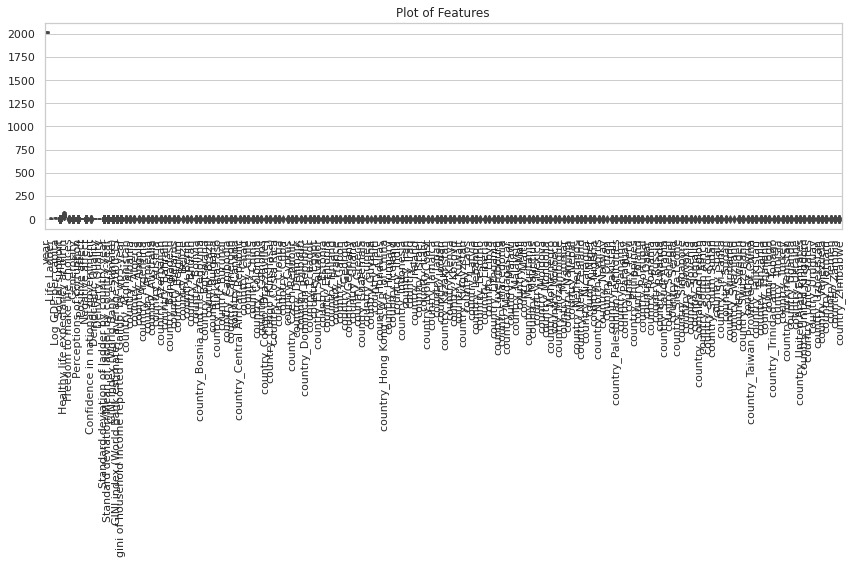

In [14]:
# Using a boxplot to identify potential outliers
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df)

plt.xticks(rotation=90)

plt.title('Plot of Features')
plt.tight_layout()

plt.show()


### Comment on Graphing for Outliers
The boxplot figure suggests that the data may not have visible outliers. Alternatively, this could also indicate that the data does not have extreme values that significantly differ from the rest of the observations.

### 3. Examine number of values in 'Life Ladder' range to best determine how to create bins

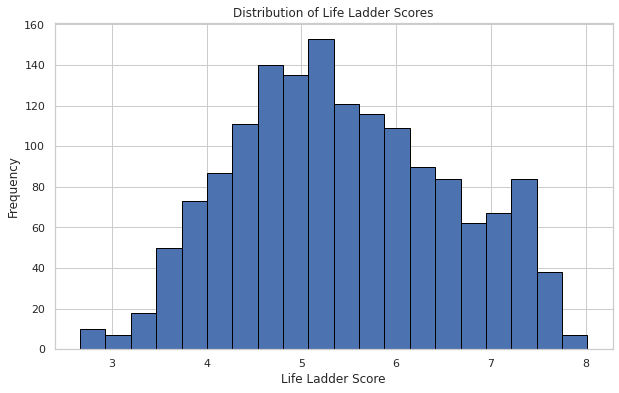

In [15]:
# First, create a histogram for Life Ladder to see how our data is spread
plt.figure(figsize=(10, 6))
plt.hist(df['Life Ladder'], bins=20, edgecolor='black')
plt.xlabel('Life Ladder Score')
plt.ylabel('Frequency')
plt.title('Distribution of Life Ladder Scores')
plt.show()


In [16]:
LL_min = df['Life Ladder'].min()
LL_max = df['Life Ladder'].max()

print("Min 'Life Ladder' Score:", LL_min)
print("Max 'Life Ladder' Score:", LL_max)


Min 'Life Ladder' Score: 2.66171813
Max 'Life Ladder' Score: 8.01893425


In [17]:
# Create a new column with the bin labels
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['Life Ladder Range'] = pd.cut(df['Life Ladder'], bins=bins, include_lowest=True)

# Count the occurrences in each bin
bin_counts = df['Life Ladder Range'].value_counts().sort_index()

# Print the bin counts
print(bin_counts)

(-0.001, 1.0]      0
(1.0, 2.0]         0
(2.0, 3.0]        13
(3.0, 4.0]       144
(4.0, 5.0]       439
(5.0, 6.0]       484
(6.0, 7.0]       302
(7.0, 8.0]       179
(8.0, 9.0]         1
(9.0, 10.0]        0
Name: Life Ladder Range, dtype: int64


In [18]:
# Remove column, as we only used it for counts
df = df.drop(['Life Ladder Range'], axis=1)

<b> Comment: </b>
Since we can see the data is distributed pretty well across the Life Ladder ranges, we can approach this by creating custom bin sizes to fit our data.

To aid in avoiding class imbalance, we can manually create our bins.

Very Unhappy: 1-3

Unhappy: 3-4

Neutral: 4-5

Happy: 5-7

Very Happy: 7-9

*Initially I wanted to try quantiles, but having perfectly distributed data could cause its own issues. Additionally, I'm concerned about including 0,1, and 10 because we have 0 examples. I'm unsure how to further approach that concern.*

In [19]:
# Creating our bins

# Create bins based on manually viewing data
bin_values = [1, 3, 4, 5, 7, 9]

# Create bin labels 
bin_labels = ['Very unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very happy']

# Create new column with bin labels
df['Happiness'] = pd.cut(df['Life Ladder'], bins=bin_values, labels=bin_labels, include_lowest=True)

# Count the occurrences in each category
category_counts = df['Happiness'].value_counts()

# Print the category counts
print(category_counts)


Happy           786
Neutral         439
Very happy      180
Unhappy         144
Very unhappy     13
Name: Happiness, dtype: int64


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### 1. Model fitting

In [20]:
# Fitting the model
y = df['Happiness']
X = df.drop(columns = 'Happiness', axis=1)
X.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

### 3. Create and fit the Linear Regression model

In [24]:
model = LogisticRegression(max_iter=10000, C=0.01)  # Adjust C value due to error
model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Make predictions on test data
y_pred = model.predict(X_test)

### 4. Evaluate model performance

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.7643312101910829
Confusion Matrix:
 [[70  2  0  1  0]
 [15 39  1  0  0]
 [ 0 10  0  0  0]
 [ 7  0  0 11  0]
 [ 0  1  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

       Happy       0.76      0.96      0.85        73
     Neutral       0.75      0.71      0.73        55
     Unhappy       0.00      0.00      0.00        10
  Very happy       0.92      0.61      0.73        18
Very unhappy       0.00      0.00      0.00         1

    accuracy                           0.76       157
   macro avg       0.49      0.46      0.46       157
weighted avg       0.72      0.76      0.73       157



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> Analysis: </b>

The model seems to perform well for all cases aside from predicting "Very Unhappy". This makes sense, as we only had 13 examples for "Very Unhappy", so the limited data is affecting our model's ability to create predicitons.

### 5. Trying a different approach

In [28]:
# We can try to use Random Forest to account for this issue, and adjust our weights

# Define class weights
class_weights = {'Very unhappy': 10, 'Unhappy': 1, 'Neutral': 1, 'Happy': 1, 'Very happy': 1}

# Create and fit the Random Forest model
model = RandomForestClassifier(class_weight=class_weights, random_state=1234)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model
class_report = classification_report(y_test, y_pred)

print('Classification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        73
     Neutral       0.98      0.98      0.98        55
     Unhappy       0.82      0.90      0.86        10
  Very happy       1.00      1.00      1.00        18
Very unhappy       0.00      0.00      0.00         1

    accuracy                           0.98       157
   macro avg       0.76      0.78      0.77       157
weighted avg       0.98      0.98      0.98       157



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> Analysis: </b>
Even after trying to use a Random Forest model, our "Very Unhappy" category is still unaffected (it had literally *1 instance*). Again, this is likely due to our small amount of data points in the category for "Very Unhappy". We could attempt to fix this by readjusting our bins, removing the "very" categories and just having "happy, neutral, unhappy" categories, collecting more data, or even trying other models.

However, the RF model did overall lead to an improved model performance.